In [69]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

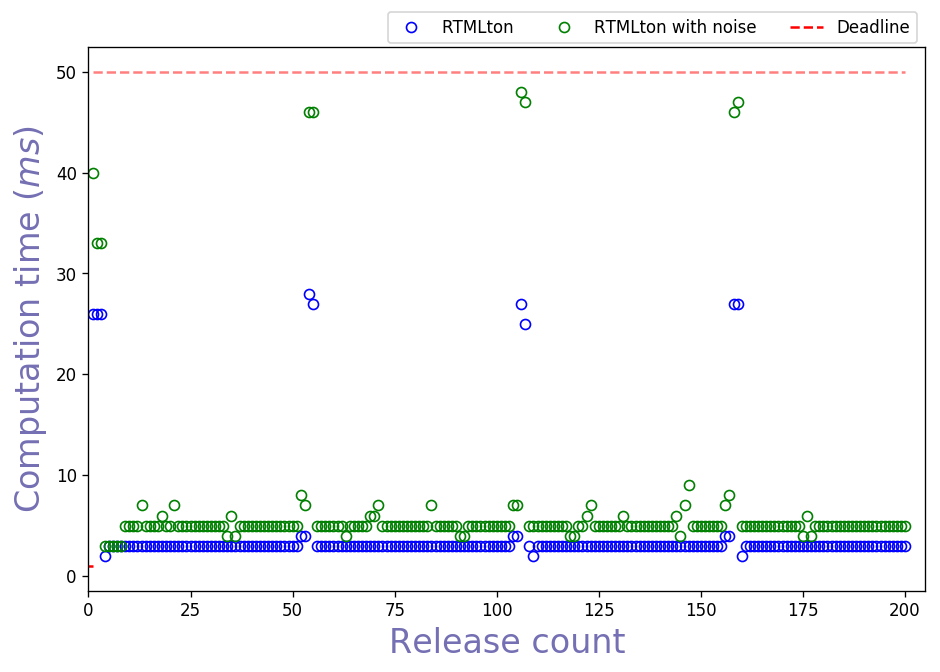

In [147]:
#RTMLTON

#prep data
with open("rtmlton_nonoise.txt") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]
content = [x for x in content if x.startswith('@')][0]
content=content[1:-2]

nonoise =  [int(s) for s in content.split(',')]


'''

rt_comptimenonoise = [25839,25782,26932,2911,3112,3100,3123,3116,3106,3099,3103,3098,3098,3059,3121,3060,3106,3059,3102
                      ,3097,3101,3097,3098,3116,3104,3119,3090,3111,3058,3105,3062,3103,3063,3104,3102,3102,3109,3100
                      ,3120,3095,3100,3100,3103,3061,3100,3060,3120,3063,3100,3100,3104,4065,4056,4052,4078,4064,4055
                      ,4058,4053,4063,4070,4059,4060,4078,4063,4059,4058,4059,4062,4056,4079,4057,4060,4058,4066,4065
                      ,4059,4070,4080,4067,4057,4072,4056,4062,4052,4062,4057,4061,4060,4058,4086,4059,4066,4060,4088
                      ,4054,4067,4055,4062,4053,4062,4056,4055,4057,4064,4070,4067,4072,4060,4062,4082,4071,4058,4068
                      ,4062,4062,4060,4071,4056,4063,4062,4060,4070,4076,4164,4084,4078,4047,4070,4061,4080,4089,4092
                      ,4081,4091,4080,4079,4072,4081,4103,4091,4065,4070,4082,4062,4080,4086,4075,4056,4072,4068,4058
                      ,4059,4080,4070,4070,4091,4092,4097,4110,4122,4081,4110,4122,4097,4068,4130,4125,4091,4124,4125
                      ,4093,4084,4122,4115,4099,4080,4119,4083,4074,4119,4087,4120,4092,4097,4065,4056,4076,4071,4062
                      ,4085,4058,4065,4061,4066,4070,4065,4064,4080,4071]
'''

nonoise = [x/1000 for x in nonoise][:200]


data2 = range(1,len(nonoise)+1,1)

data4 = [50 for x in data2]


#prep data
with open("rtmlton_noise.txt") as f2:
    content2 = f2.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content2 = [x.strip() for x in content2]
content2 = [x for x in content2 if x.startswith('@')][0]
content2=content2[1:-2]

noise = [int(s) for s in content2.split(',')][:200]


'''
noise = [41824,37085,36642,3359,3654,3337,3580,3606,5372,5735,4956,5931,6010,5571,5910,5668,5738,5435,5716
                    ,5611,5647,5689,5531,4976,4772,5125,5068,5006,4968,5028,3460,5061,5395,5784,5700,6658,5552,5450
                    ,5788,5603,5571,5636,5440,5476,4920,4897,5009,4988,5104,4941,4952,6286,4870,6695,7319,7916,7644
                    ,7872,7625,7971,7635,7664,7905,7790,7813,7809,7727,7741,7029,7034,6899,6910,7196,7020,7031,4814
                    ,6569,7593,7963,7820,7850,7845,7604,7934,7441,7879,7550,9276,7717,7534,7834,7736,7600,7833,8099
                    ,7940,7819,7777,7997,6634,7894,7535,7841,7855,7803,7940,7832,7879,7798,7968,7484,7567,6668,9107
                    ,7652,7641,7871,7662,7296,6831,6419,6576,7794,7712,7850,8254,7973,7842,7825,7816,7774,6991,7206
                    ,6985,7013,6979,6860,7265,4880,7472,6818,6599,6937,7140,7495,7540,8039,7611,7815,7893,7873,7513
                    ,7513,7660,7608,7524,7700,7705,7025,7117,7201,6832,9197,6860,7726,8015,7881,7988,7932,8026,8267
                    ,7898,7343,7628,7929,7973,7912,7673,7822,7836,7904,7132,7070,7020,6772,7799,7895,8004,7669,7891
                    ,7488,7872,7133,7443,7966,7850,7703,7793,7023,6929]
                    
'''

noise = [x/1000 for x in noise]


testd1 = range(1,2001,1)

testd2 = [50 for x in testd1]


testnonoise = [28741,26437,28125,2704,3156,3026,2958,2998,3041,3005,2957,3004,3044,2998,2999,3000,2914,3012,3024,3107,3010,2984,3007,3042,3004,2956,3010,3048,3002,2999,2994,3081,2995,3007,3000,3192,2959,3027,3050,2912,2974,3175,2953,3017,2958,3076,3003,3001,3007,3165,3006,3956,3996,28532,26149,2958,2983,3045,2994,2972,2990,3078,2991,3017,3337,3004,2995,3012,3003,2995,2963,3003,3104,3007,2956,2996,3154,2998,3008,3165,2999,3008,2992,3063,3006,2950,3008,3117,3032,2954,3047,2949,3004,2999,3167,3007,3112,2999,3079,3004,2953,3005,1292,2791,2513,23294,26924,2410,3102,2997,3009,2727,3096,2997,3017,2994,3050,2957,2999,3020,3013,2953,2998,3150,3042,2992,2996,3093,2995,3000,2992,3174,2965,2997,2955,3079,2962,2997,2983,3168,2953,2997,3004,3077,2998,3000,3004,3169,3005,2953,3010,3030,3008,2952,3001,4116,3988,27645,26361,2626,2961,3003,2999,3169,2953,3003,2957,3075,2951,3004,2948,2990,2994,2992,3111,2998,3006,2998,3156,2953,3003,2956,3082,2953,3003,2951,3165,2952,2996,3003,3054,3002,2998,3004,3105,2998,2956,3000,3036,2992,2950,3008,3220,2992,2994,2999,3114,3931,3979,26041,29017,2482,2615,2959,3072,2952,3047,2954,3060,2989,2988,3013,3147,3005,2993,3000,3041,2992,2950,3006,3023,2999,2951,3000,3104,2988,3008,3078,3001,2994,3003,3100,2998,2954,3007,2999,2985,2951,2995,3168,2993,3009,3039,3110,3007,3000,4151,2688,2970,3943,4330,26842,28048,2790,3174,2998,2996,2963,3004,2996,3000,3147,2992,2957,2997,2997,3001,3259,3009,3114,2995,2991,3008,3074,2997,3003,2994,3186,2990,3002,2951,3086,2953,3028,2953,2997,2954,2991,3105,2990,3004,3000,3170,2991,3002,3004,2989,2952,2999,3005,3003,3938,3974,25218,26094,2836,2988,3108,2992,3007,2998,3143,2954,2997,2951,3101,2952,3001,2975,3147,2988,3002,2998,3101,3019,2996,3174,3099,3008,2954,3005,3016,3007,3164,3002,3150,3001,3012,3018,3064,2995,3012,2957,3086,2952,2997,2955,3076,2953,2986,3033,3138,3001,3937,3921,26592,26153,2845,3047,2954,3106,2956,2998,2955,3136,2957,3024,3002,3089,3001,2988,3002,2998,3005,2954,3177,2950,2994,2952,3077,2952,3027,2997,3102,3003,2995,3002,2999,3014,2953,3103,2954,3004,2952,3059,2951,3007,2993,3156,3002,2998,3014,3065,3002,2999,3939,4222,27190,27484,2534,2987,3000,2951,3000,3180,2997,2996,2994,3070,2993,3001,2954,3166,2952,2998,2964,3076,2957,2998,2997,3167,2996,2997,3012,3041,3000,2952,3002,3111,2993,2953,2999,3041,3000,3006,3000,3168,2992,2510,2989,2843,2952,3001,2950,3103,2952,2999,3940,4063,27658,26097,2248,3152,3011,2995,3003,3042,2999,2954,3021,3101,3001,2952,2995,3168,2992,2996,2991,3094,2990,3003,2992,3162,2951,3010,2956,3050,2982,2932,2950]

#2000
testnonoise = [46260,35872,36478,3468,3430,3441,3520,3355,3526,3428,3369,3451,3503,3395,3513,5079,4596,4441,5782,5322,5229,5216,5280
               ,4685,4684,4839,4701,4802,6347,4873,5316,5326,5310,5024,4882,5049,5005,3530,3407,3438,3534,3330,3412,3479,3409,4211,4744
               ,5227,5263,4792,4766,6707,5061,50584,44152,4766,4717,4753,5304,4975,4876,4863,4810,4770,5001,4876,4663,2037,3406,3451,3356,3430,3401,3432,4550,5129,5707,4691,4657,4773,5080,4690,4686,4683,4879,3465,3703,3527,3496,5908,4574,5048,4862,4710,4702,5039,3769,4925,3420,3421,3669,3422,4713,7229,7101,44191,44556,4808,4621,4726,4939,4861,4715,4824,4922,4874,3393,3379,3378,3442,3245,5323,5510,4839,4493,4693,5030,6507,4865,3502,3483,4844,5556,4931,4926,5233,5306,4750,5002,4911,4825,4991,4816,4827,4335,4885,3474,3462,3265,3427,3325,3367,4187,5230,5349,7464,6992,43993,44040,4965,4900,4837,3530,3451,5212,5275,4878,4743,4914,4808,4804,4827,4964,4830,4868,4718,4797,3469,3270,3462,3464,3350,4797,4936,5499,5299,4814,4867,4823,4878,4737,4955,4710,4853,4936,3452,3405,3372,3497,5262,4895,4841,4732,4945,4743,4054,4891,7008,4975,36266,35505,5031,4801,4880,4977,4944,4777,4701,4772,4856,5341,4862,5008,4942,4921,4960,3578,3463,3274,3335,3430,3192,5240,4688,5239,5492,4850,4778,3457,4853,7113,4553,4748,4892,4898,5223,4549,5192,4625,4542,4528,4681,4154,4703,4833,3583,3433,3460,3200,4917,4970,40220,44812,5211,4701,4781,4618,4698,4986,4235,4738,4735,3301,3343,3429,3272,5822,5184,4893,4634,4875,4621,4833,4712,4741,4323,3470,3465,3398,4498,5214,4809,4707,4702,4991,4885,4534,4698,4570,4742,4208,3374,3405,3349,3558,3447,3307,5129,4567,3765,4760,6774,6806,37367,36699,3485,4874,5256,4842,4723,4759,4625,4769,5244,4765,5189,4919,4982,4924,3596,3388,3330,3482,3481,3405,3449,4238,5158,5340,4823,4725,4757,4880,4809,3400,3385,5494,5059,5358,4837,4700,4783,4802,4745,4886,4992,4847,4831,3467,3567,3841,3310,3452,5083,7329,45472,44408,4811,4871,4810,4797,4801,4748,4573,4850,4221,3392,3827,3446,5109,5220,4676,4790,4772,4236,4750,4691,4585,4571,3491,3397,3404,4501,5262,4672,5777,4615,4622,4590,4744,4721,4777,3601,4678,4668,3388,3477,3374,3512,3363,5232,5286,3844,4770,4612,6603,6667,42442,41460,3369,3441,4001,4759,4481,4874,4719,4658,4737,4642,4878,4715,4603,4922,4375,3443,3743,3322,3409,3366,3378,5244,5272,5297,5323,4768,4709,5601,4572,4239,3454,5106,5198,4805,4690,4742,4826,4786,4704,3824,4761,4816,4493,4629,3326,3458,3479,3369,4879,6350,43581,42922,4666,4801,4677,4685,4179,4702,4780,3509,3773,4024,3387,5918,4811,4636,4703,4760,4032,4718,4670,4690,4734,3452,3421,3472,3412,5206,5279,5329,4817,4758,4752,4551,4683,4677,4805,4632,5055,3713,4108,3434,3449,5168,4758,4744,3747,4618,4795,4953,6700,6664,36369,36802,3475,3507,4814,4711,4771,4756,4808,4791,4826,3930,4892,4024,4885,4637,3351,3482,3586,3450,3363,5332,4779,5466,4809,4774,4760,4721,4912,4807,3440,3794,3370,4777,5228,4755,4741,4636,4664,4599,4884,4799,4655,4688,4645,3668,3449,3407,3287,3315,7094,6122,43578,43945,4746,4721,4858,4827,4350,4760,4820,3538,3451,3687,3415,5613,5441,4831,4848,4920,4651,4581,4900,4583,4529,4567,3230,3244,3597,3300,4949,4429,5313,4818,4247,4885,4888,4894,4794,5003,4980,4597,3338,3442,3444,3361,5612,4700,4758,4727,4719,3901,6576,6498,42693,42952,4566,3483,3813,3719,5068,4310,4699,4661,4640,4675,4698,4684,4559,4762,4644,4081,5335,3454,3459,3430,3396,5893,5272,4608,4694,4723,4952,4758,4905,5030,4843,4610,3335,3991,3448,3507,5056,4962,4848,4739,4871,4801,3742,4756,4203,4871,4887,3544,5341,4933,38886,43700,4655,4842,4831,5092,4970,4888,4905,5759,4975,4778,4630,4069,3665,4298,3448,3423,5017,4448,4768,4927,4719,4817,4739,4833,4969,3445,3730,3751,3476,5248,5332,4928,5043,4889,4838,4782,4798,4703,4779,4976,5447,3958,3403,3690,3381,3400,5382,4247,6821,6942,44056,43867,4684,4711,5561,4653,3742,3440,3427,3503,5818,4928,4805,4692,4675,4762,5073,4821,4810,4878,4720,3798,3480,3661,3446,3437,5265,5074,4929,4781,6293,4886,4676,4703,4977,4570,5000,4801,3753,3510,3429,3351,5507,4679,4763,4797,4695,3496,4519,4827,6777,6768,42591,39528,4105,3301,3407,5224,5006,4654,4900,4807,4640,4745,4799,4586,4556,3709,5006,4696,3383,3678,3565,3493,3571,5531,5433,4751,4728,4814,4951,5025,4910,4851,4676,3340,3683,3832,3294,6433,5191,5292,4970,4720,4884,4722,4823,4609,4686,5413,4748,4666,5186,5943,35694,38615,4702,4647,4782,4503,4654,4710,4613,4669,4735,5284,4784,4906,4538,3835,3801,4008,3372,3948,3476,5348,5372,4635,4629,4682,4670,3688,4596,4729,5265,3390,3426,5307,4789,5617,4927,4844,4937,4768,4696,4835,4717,4803,4712,4660,4645,4548,4317,3579,5364,5168,37792,36077,3287,5167,5185,5135,5025,4623,4810,4685,3346,6179,4666,4926,5458,5140,4679,4860,5516,4909,4548,4682,5064,4846,4849,4507,5172,3498,3931,3310,3667,3356,3428,3453,4945,4993,5446,5485,4870,4738,4992,4844,4907,4487,3401,3885,4323,3414,5199,5267,6705,6666,43585,45201,4960,4832,4945,3927,4898,4643,3454,3371,3483,4888,5152,4679,4750,4705,4614,4749,4828,4817,4788,4803,4976,4710,4649,3715,4265,3448,3547,3586,3458,5963,5198,4714,4072,4705,4749,4571,3307,5323,5512,4834,4746,5185,4678,4700,4614,5009,4665,4607,6519,6621,42422,41587,4534,5057,4132,3298,3405,3365,3293,3397,3381,5022,4949,5391,7029,5115,4592,4672,4784,4036,3676,5408,5306,4997,5237,4795,4588,4983,4928,4916,4899,4849,4709,4806,3900,3488,3709,3433,3421,3280,3310,5056,5392,5315,5442,4770,4865,4951,4796,4822,7012,6856,44308,39549,3435,3299,3441,3405,5374,5397,4792,4896,4824,4732,4873,3772,4666,4693,3535,3469,3255,4698,5475,5427,4991,4841,4931,4926,4866,5272,4761,4760,4507,4875,5214,4917,3587,3336,3422,3434,3494,3369,5189,5142,4761,3774,5135,4655,4719,4574,3454,4749,7185,7518,42995,43714,4764,4705,4735,4655,4658,4679,4300,4637,4644,4511,4754,3520,3465,3366,3419,3536,3389,4204,5549,5259,4732,4681,4668,4894,4743,4855,2449,3436,3403,4522,4807,4545,4927,4682,4748,4678,4848,4628,4107,3880,4857,3338,3509,3321,3307,3416,4585,5110,7567,6563,43034,43152,4644,4668,4713,4700,4748,4729,4627,4762,3684,3446,3446,3389,5255,5274,4712,4711,4863,4179,4838,4797,4846,3497,3213,4482,5216,4658,4980,4718,4790,4699,4826,4683,4584,4866,4707,4690,4859,3350,3489,3269,3332,3468,3267,5316,4876,5104,5389,4850,6662,6028,35733,39744,4786,4642,4804,5033,5302,4901,4737,4644,4830,4595,4719,4562,4865,4882,3469,3364,3272,3432,3266,3349,5614,5521,5341,4935,4776,4713,4710,4744,3776,4497,3708,3488,3315,5187,5222,4558,4559,4797,4691,4863,4878,3694,4767,4557,3424,3449,3241,3480,6734,7141,47497,43753,4905,4799,4898,4682,4885,4731,4634,4751,4784,3445,4147,3371,3265,3646,5319,5297,4799,4597,3845,4543,4759,4826,3432,3400,4868,5252,4791,4728,4739,4744,4752,4815,4821,7073,4691,3651,4641,4829,4328,4242,3291,3339,3507,3380,4189,5250,5312,4859,6734,6793,41775,36297,3430,5104,4801,4652,4675,5425,4657,4741,4907,4683,4925,4686,4803,4687,4783,3495,3298,3355,3468,3329,3253,4782,5255,5268,5099,4520,4547,4750,4491,4591,5396,4753,3471,4312,3460,5987,4716,4711,4791,4630,4731,3745,4789,4787,4291,3435,3501,3445,5124,7158,45010,44057,4843,4854,4855,4675,4882,4695,4769,4711,4697,3460,3519,3432,3481,3273,5287,5373,4663,3826,4693,4855,5041,4884,5471,3375,4576,5131,4918,4819,4797,4822,4780,4829,5075,4880,4825,4860,4769,4917,4879,3488,3271,3405,3575,3358,3442,5137,5349,5310,7080,6590,42792,42636,4096,4493,3292,5719,4826,4545,4984,4590,4742,4774,4690,4528,4741,3771,4624,4637,4609,3413,3691,3207,3313,3472,3315,4405,5347,5126,5340,4756,4899,4709,4941,4283,4824,4756,3687,4002,3371,5283,5219,4547,4577,4720,4744,4742,4230,4805,4598,4319,6610,5070,35207,36155,3495,5044,5101,5512,4937,4787,4577,5033,5043,5037,4602,4444,4765,4644,4499,3318,3418,3564,3364,5177,4949,4727,4793,3902,4857,4860,4482,4860,4695,3417,3482,5288,4792,4875,4793,4727,4664,4837,5105,5319,4769,4954,4645,4755,4713,3435,3775,3442,4897,4678,44130,44124,5365,4820,5004,4149,4736,4809,3435,3768,4523,4733,4744,4722,4978,4914,4839,4907,5023,4784,4841,4762,4842,4733,3455,3771,3280,3388,3323,4205,5364,4876,4852,5029,5003,4729,4959,4818,4767,3500,3624,3643,3491,5204,4652,4579,4760,4660,4733,3885,6765,6896,43377,41337,3388,3560,3424,3468,4699,5338,5258,5110,4785,4894,4908,4935,3993,4715,4795,5065,3410,2834,3887,3240,3388,5261,4613,4696,3880,4754,4524,4591,4623,4742,3303,4151,4060,5225,4978,4684,4570,4643,4590,4978,5972,4708,4687,4664,4798,4799,3626,3381,4954,4781,35075,43735,4932,5232,4801,4559,4541,4684,4665,4702,3401,3321,4039,4841,4657,4888,4627,4777,4618,4787,4680,4632,4606,4591,4850,4858,3617,3431,3440,3399,3443,5243,5189,5148,4711,4761,4638,4814,4658,4315,4598,4733,4518,3382,3235,4085,3316,5352,4620,4631,6570,6800,41375,42418,4574,4671,4977,4744,3383,3695,3300,5776,5228,4768,4772,5003,4717,4712,4624,5007,4580,4758,5046,4470,5122,3251,3542,3345,3324,3591,5073,5216,4727,4666,4750,4809,4639,4853,4627,3609,4039,5216,5150,4581,4819,4723,4837,4796,4615,4822,4798,4287,6081,6931,43472,44182,3766,3308,3551,3334,3572,5147,4926,4665,4592,4650,4674,4778,4640,4634,4076,4731,3583,3761,3424,5224,4578,4683,4703,4627,4809,4712,4542,4693,4829,4628,4731,3459,3694,3440,3447,5172,5300,5054,4636,4606,4735,4756,4781,4823,5060,4903,4518,4777,4813,5036,36184,35173,3477,5231,4680,4637,4745,4619,4720,4589,4633,4665,4596,3364,3426,5000,4768,4829,4662,4689,4567,4631,4917,4761,5385,4853,4759,4847,4517,3396,3811,3312,3298,3432,3440,5304,5287,5102,5339,4726,4334,4822,4813,3366,4855,5056,4545,4791,4419,4516,6669,6499,42202,43510,4607,3501,4606,5240,4586,3411,3425,3476,3442,3462,4319,5184,4660,4778,4757,4792,4615,5870,4767,4696,5037,3495,3393,3524,3456,5779,5049,4850,4881,4725,4841,3994,4441,4778,4624,3905,4172,3698,4665,5152,4655,4818,4834,4667,4669,4736,4653,4880,6594,6775,43783,44645,3960,3673,3586,3379,3347,3504,5177,5262,4013,5308,5375,4338,4764,4611,3555,5678,4866,5010,5148,4717,4961,4677,4801,5241,4879,4852,4765,4884,4403,4937,4875,3613,3564,3604,3445,3486,3549,5182,5162,5315,4871,4790,4940,4680,4837,3601,3547,3427,7258,7176,43140,43941,4968,4837,4853,4756,4573,4669,4741,5007,4733,3479,3348,3475,3498,3621,4613,5556,5445,4934,4668,4940,4703,4867,4609,4847,4793,3599,4179,3366,3425,3393,5464,5224,4731,4852,4623,4754,4752,4540,4715,3408,4040,3353,4933,5239,4892,4983,4914,4879,7357,6880,45129,44520,5739,4878
               ,4551,3443,3411,3376,3429,3377,3375,5283,4764,4172,4905,4771,4627,4842,4951,3545,6077,5382,5047]


testnonoise = [x/1000 for x in testnonoise]

testnoise = [44787,37439,37516,3324,3430,3457,3435,3451,5300,5006,4761,6467,5573,5699,5573,5703,5519,5728,5397,5603,5586
             ,5464,5406,5482,5675,5481,5573,5542,5274,5745,5536,5513,5538,5021,4838,5507,5634,5845,5529,5877,5746,5481
             ,5510,5328,5449,6373,5204,5280,5574,5274,5366,7531,7368,47154,47591,5624,5304,5675,5529,5144,4549,5288,5367
             ,5465,5784,5594,5482,5558,5577,5441,5623,6789,5500,5618,5448,5304,5370,5424,5601,5293,5382,5859,5470,5575
             ,5188,5080,5266,5796,5351,5755,5555,5504,5334,5178,5113,5398,5531,5513,5522,5671,5441,5377,5539,7788,7466
             ,48314,50240,5253,5477,4694,5056,4804,5786,5398,5610,5372,5324,5436,5284,5596,5476,6409,4452,6840,6855,5468
             ,5548,5441,5298,5355,5569,5582,5472,5491,5563,5437,4928,5304,4809,5588,5173,5273,5275,5428,5269,5375,5717
             ,5477,6330,5474,5634,5594,5602,5460,5704,7524,7875,47655,48499,5442,5425,5775,6032,5699,5205,4959,5636,4834
             ,5736,5647,5493,5696,5896,5597,5627,5657,5535,5275,5318,5514,5404,5607,5575,5504,5490,5607,5516,4152,5536
             ,6665,5007,5798,5537,6730,5833,5589,5668,5616,5432,5719,5738,5498,5927,5602,5198,5489,5351,6336,7504,47937
             ,48069,5470,5394,5547,5051,5392,5129,6030,5702,5678,5655,5768,5782,5647,5547,5509,5720,5549,5643,5461,5435
             ,5448,5623,5475,5399,5393,5325,5465,5631,5505,5902,4720,5135,5330,3880,4695,3767,4515,5543,5686,5745,5389
             ,5778,5214,5443,5463,5707,5272,5563,7454,7856,47330,48889,5323,5447,5641,5708,5751,6938,5712,5479,5814,5764
             ,5691,5860,5663,5787,5592,5312,5647,5462,5578,5721,5602,5479,5470,5499,5600,5110,5634,5538,5541,5446,5116
             ,5428,5600,5547,5772,5385,5570,5389,5719,5378,5657,5379,5528,5445,4922,5273,5633,5444,8034,7718,49190,47449
             ,5618,5480,5359,4843,6934,5455,5565,5368,5750,5748,5521,5409,5864,5426,5687,5497,5695,5412,5782,5464,4949
             ,4805,4992,4780,4824,4836,4986,5631,5484,5207,6662,5512,4843,5353,5374,5588,6336,5398,5482,5713,5434,5172
             ,5392,5430,5211,4811,4683,4104,6336,6650,48659,44872,5340,5190,5315,5228,5442,5432,5355,5219,5399,5169,5254
             ,5558,5549,5321,5332,5404,5423,5319,6122,4578,4790,5252,5344,5181,5339,5541,5392,5404,5311,5409,5366,5342
             ,5308,5471,5620,5261,5346,5154,5457,5552,5342,5378,5373,5340,4732,6530,5618,5361,7497,7583,48792,47954,5540
             ,5451,5767,5469,5725,5663,5985,5247,6243,5392,5694,5515,5689,5520,5799,5455,5458,5367,5356,5665,4598,6466
             ,4762,4282,3309,3420,5519,5728,5603,5431,5538,5495,5518,5495,5758,5680,5739,4802,5138,4937,4376,4712,5559
             ,5741,5603,5553,5651,5344,7850,7785,48695,48688,7346,5711,5615,5612,5707,5744,5810,5615,5631,5363,5569,5436
             ,5692,4899,4750,5473,5668,5556,5545,5647,5647,5376,5631,5683,5587,5359,5806,5448,5439]

#2000
testnoise = [42534,33601,33136,2961,2968,2891,3095,3083,3003,3026,3043,3052,3077,2919,3006,4824,4008,5186,5167,4899,4585
             ,4654,4792,4787,4695,4756,4766,4800,4836,4744,4676,4752,3001,3069,3074,2962,3044,3018,2942,2921,3013,2915
             ,4262,3550,5505,5251,4610,4808,2938,2879,5211,7506,7038,44187,44027,4731,4909,4899,4687,4934,4804,4474
             ,2949,3024,3182,2965,3044,2898,4458,5559,4794,4969,4977,4894,4786,5288,5076,2927,2953,2951,3067,2936,5323,4766,4883,4725,4758,4764,5592,4964,3055,3066,3226,4485,5321,4592,4902,4777,4749,4590,4843,5018,4900,5598,4527,33178,33001,3136,3155,3069,5447,4850,4563,4715,4964,4790,3052,3248,4594,4936,4987,4777,4801,4905,5526,4919,5503,4726,3695,3045,2938,3020,2934,2995,2971,2966,4007,5489,4837,4872,4586,5079,4004,3042,2952,2955,5659,5008,5059,4893,4779,4887,4076,4763,4796,5943,4274,32511,32278,3001,3062,5060,4748,4707,4748,4756,4785,4751,3770,4789,2987,2996,3079,2907,3100,5612,4488,4891,3513,4023,4840,4615,3119,3083,3109,3103,5062,5277,4824,4855,4551,4841,4696,4804,4672,4387,2954,3131,2969,3145,3035,5078,4764,5152,4714,4735,3825,6643,4825,32831,33313,6038,4859,4756,4872,4750,5114,4292,4972,4895,4923,4783,1675,2974,3032,3029,2998,2991,5037,5462,5346,5042,4910,4562,4767,3009,3299,5675,4909,5024,4949,4945,5346,5001,4694,4253,4700,3375,3124,3142,3060,3024,3034,3048,5333,5306,5334,3833,4724,6463,6766,32666,34586,3028,5830,4695,4700,4719,5028,4880,4980,4066,4674,4925,3126,3061,4472,3034,3318,3038,4352,4757,4672,4973,4642,4632,3618,3961,3120,3181,3249,3048,5262,5254,4678,4837,4526,4665,4873,4659,4334,3253,3423,3042,3465,4553,5602,5852,5363,5023,4752,5868,6742,40395,33950,3018,3809,2983,3021,5363,4877,4917,4774,4714,4677,4848,3060,4196,3228,3468,3014,4359,5273,4759,4908,4908,4858,4890,4642,4987,3239,3911,3280,3089,3026,2927,5067,5195,5342,4687,4730,4772,4669,4795,3184,3082,2906,4587,5523,4652,4954,5229,5189,6839,6806,43039,46989,4720,3065,3013,3046,2991,3051,5437,4601,5062,4782,4930,4817,4973,3701,3384,3662,3063,2998,4912,5477,4759,4876,4803,4915,4912,4860,4936,3008,3024,3068,2992,5887,4870,4897,4806,4725,4805,4877,4684,4826,3842,3208,3239,3520,2973,5522,4909,4646,6982,6762,45036,43432,4941,3033,2995,3085,3263,5042,5303,4964,4874,4589,4796,5171,4602,4867,4813,3331,3245,3095,3070,3102,4659,4465,3383,4620,4602,4611,4767,3456,3044,3027,3015,3663,3109,5171,4754,4619,4793,4688,4566,5219,4932,4740,3063,3819,3281,2956,5712,4814,5121,6767,43132,43266,4797,4620,4637,4683,2991,3194,3394,3108,3240,2986,5361,4571,4779,3491,4768,4199,4741,3245,3087,3097,4723,4774,4858,5366,4772,4616,4786,4690,4988,4718,3333,3009,2991,3029,2992,3101,2978,5415,5368,5505,3893,4666,4713,2991,3163,5045,5927,5010,7187,6800,43839,44058,4630,3486,5188,4697,4246,4323,3358,2962,3080,2978,2999,3034,4045,5601,5333,4706,4794,4838,4715,4903,4852,3015,2973,3006,2943,5336,4638,4755,4824,4836,4591,4645,4881,4828,3288,2994,3234,2951,3006,4026,5202,5126,4746,4664,4802,5096,4891,4720,6847,4213,36261,32314,2967,2920,2917,5283,5293,4841,3528,4715,4643,4887,4804,3051,3258,2918,5422,5221,4886,4830,4793,5030,5412,4711,4766,3639,4651,3035,3357,2976,3064,2955,3077,5351,4882,4724,4799,4693,4529,4787,3109,3058,3169,5911,4759,4914,4725,4930,6716,4789,5508,6719,43453,32869,3011,3428,3023,2941,3121,5829,5165,4812,4643,5009,4138,5412,4542,3782,3327,3587,4997,4526,4825,4681,4656,3463,4701,4544,4782,3046,3373,3246,3084,2989,5124,4755,4670,4627,4305,4568,4714,4720,4681,3006,3086,3221,3055,3012,5181,5182,4568,4666,6648,6656,43211,44295,4527,3058,2376,5441,4625,4667,4752,4838,4660,4649,4681,4652,4653,3022,3018,3699,3023,2991,3058,2918,5788,4271,5342,4617,4596,4377,2974,3005,5423,5056,4701,4772,4878,4884,4778,3430,4704,4749,4668,4729,3283,3698,2994,3105,3048,2975,3010,3735,7414,7597,44337,43572,4857,4810,3053,3458,5676,4928,4708,4897,4661,4689,4824,4570,4711,4719,5129,4485,3311,3298,3069,3070,3100,2925,3785,5180,4805,4234,4777,4770,4738,4712,3030,3250,3327,3000,5210,4820,4690,4582,4904,3598,4997,4856,4831,2936,3430,3596,2942,3198,5858,7380,43304,43859,4882,4889,4784,4913,4819,4761,3148,3991,3264,2914,3053,5388,4811,4585,3387,4776,4842,4685,4530,3000,3072,3521,5465,4883,4734,4728,4913,4868,4651,4665,4785,4147,3014,4014,3199,2985,3044,2977,2933,5107,4238,5279,4900,4664,4527,3400,3015,4932,6600,6839,43939,44393,5005,4692,4835,4490,4609,3983,4798,3071,3514,3077,2996,2968,3123,3020,3799,5351,4756,4768,4742,4682,4748,3131,3469,3387,5184,4766,4701,4622,4825,4625,3930,3940,5017,4678,3375,3404,3190,3092,3036,2976,3998,5272,4697,4798,4802,4730,4644,4773,4373,4452,35804,34284,2981,5160,4775,4756,4669,3681,4501,4791,4410,4810,3127,3245,3641,3169,2927,4342,5283,4788,4813,4680,5232,4760,4990,4691,3095,3676,3261,2991,2986,5349,4673,4513,4071,4826,4835,4865,4799,4784,3084,3108,4032,3119,4208,5472,4878,4831,4777,4809,6721,6900,45693,45857,5023,3139,3399,3093,3008,5229,4846,3583,4761,5324,4866,4506,4922,4341,2992,3468,3111,3037,2994,4503,5474,4957,4932,4947,5058,4749,4966,4762,3551,3441,3841,3341,5478,5097,4763,4937,4970,4769,4984,4764,4703,4672,3095,4189,3757,3228,3262,3035,7832,7636,44541,42898,4466,4964,4794,4921,4691,3080,3913,3925,5305,5650,5021,4793,4947,4740,4823,4786,4948,4217,5401,3489,3457,3118,3191,3025,3115,5022,5571,4624,4990,4962,4935,4833,4509,4990,3899,3395,3923,5428,5116,4874,4927,4856,5018,4961,4726,4946,4830,3554,5366,5583,34433,33870,3105,4878,4676,5007,4905,4994,4957,5092,4541,4994,3202,3530,3163,3926,2806,5713,5077,4661,5099,4898,4932,4764,6161,4914,3097,3875,3850,3074,3405,5009,5354,5197,4869,4741,4587,4975,4389,6659,5356,3496,3324,3726,3209,3184,5344,5476,4377,4849,6857,7098,44308,42709,4916,5660,3671,3880,3321,3258,5070,5014,4924,4926,4916,4936,4159,4896,4705,4968,3121,3500,3819,3139,3087,5537,4894,4387,4804,4863,4825,4833,4709,4662,3154,3295,3326,3173,3226,4926,4632,4842,4852,4814,4877,4820,4840,4858,3055,2524,3431,3546,4552,7320,43347,50729,4668,4547,4738,4690,4759,4737,5162,3409,3261,3629,2937,3360,5069,5079,4663,4701,4555,4728,4625,4723,4588,3240,3437,3218,3588,2861,5073,4736,4708,4413,4781,4788,4616,4818,4728,2936,3771,3844,3304,3053,5143,4849,4860,4894,4826,4493,4624,4654,6675,4740,37005,35838,3578,2931,5213,4879,4340,3598,4762,4188,4014,4719,4678,3345,3034,3674,3048,3031,4900,4660,4783,4629,4635,4587,4708,4767,4642,3450,3001,3734,3412,3313,4989,5218,4291,4670,4768,4660,4745,4940,4636,4497,4139,3410,3023,3191,5701,4794,4761,4717,6463,6745,42047,48895,7691,4686,3034,3774,3257,3461,2963,5380,4813,4759,4803,4834,4810,4811,4420,4792,3063,3152,3194,2950,3394,4931,4696,4753,4732,4862,4656,4933,4740,4800,3072,3349,3082,3350,3046,5472,4667,4472,4728,4759,4832,4689,4686,4604,2999,3504,3597,3287,4498,6811,43413,43293,4920,4759,4741,4225,4654,6755,5130,3596,3595,3860,3007,5074,3027,3450,6080,4885,4568,3897,4851,4645,4822,3082,3484,3281,3306,2981,2975,4894,5110,4684,3469,4862,4732,4756,4546,3137,3804,3112,5232,4628,4759,4726,4781,4704,4892,4602,4757,4653,7323,4979,36592,35723,3068,3551,2997,3051,5228,5518,5027,4887,4621,4697,4555,3199,3540,5394,4978,4895,5378,4872,4695,4694,4669,4670,4148,4573,4767,3117,3643,3380,3621,3076,2944,3026,3774,5158,4984,4711,4634,4706,3122,3255,5319,4711,5239,5285,5469,4668,4714,4584,6610,7686,45867,43329,3301,3232,3376,3073,3042,2968,3051,3693,5427,4642,4789,4951,4659,4568,4610,3060,3530,3102,5764,5335,4729,4717,4670,4675,4767,4805,5701,5695,3140,3030,4193,3039,3179,3390,4191,5352,4731,4737,4968,6165,4331,4828,4833,3061,3665,3584,3063,3122,7275,7665,44498,45148,4810,4357,4520,5783,5145,4954,3562,3143,3102,3665,5011,4836,4772,4724,4811,4718,4845,4987,4782,4915,3547,3152,3758,3077,2996,3064,2995,5302,4812,3927,4965,4687,4797,3017,3094,4707,5201,5139,5138,4941,4780,4827,5055,4191,5216,5173,5468,3246,5476,5236,33647,33025,2974,2981,3005,3798,5407,6265,4827,4662,4738,3039,3679,3398,5604,5904,5140,4772,4981,4881,5003,4755,4951,4950,4605,3479,3203,3124,3003,3084,3039,2995,4455,5532,5513,4633,4862,4767,4757,4744,3553,3889,3471,3041,5401,4853,4837,4812,4780,4720,6742,7065,43660,40896,4250,3464,3488,2923,3079,4493,5841,4962,4778,4956,4811,4736,4935,4784,4786,3720,3186,3163,3015,3002,5478,5602,4803,3994,4809,4477,4851,4764,3392,3475,3603,2946,4688,5326,4758,4840,4274,4895,4869,4653,4676,5272,4634,3021,3178,3056,2983,3012,7296,6669,43663,43809,4730,4532,4605,4466,2707,3040,3796,3547,4630,5061,4652,5191,5267,4954,5084,4756,4982,4753,3308,3674,3514,3023,3047,3060,4155,4900,4742,4809,4790,4722,4961,3031,3705,3246,3595,3082,4685,4920,4724,4885,4111,4732,4652,4735,4742,3284,3383,3450,4255,4274,35143,42296,5321,4777,4712,4738,4728,4879,4631,4968,2991,3572,3122,3014,3058,4609,5306,4701,3749,4796,4876,4669,4251,5265,3264,3537,4006,3016,3093,5101,4935,5203,4744,4764,4786,4758,4679,5095,3378,3557,3421,3111,2982,5502,4781,4619,4327,4726,4693,4752,6728,11379,41086,35398,3294,3123,3382,2950,3253,4045,4782,4788,3485,4795,4629,4629,2951,3574,3130,3734,2996,5836,4715,4819,4366,4838,4888,4813,4838,4655,5048,3824,3982,3706,3087,3030,5383,5078,4771,4769,4750,4872,4892,4854,4703,3784,3555,3733,3073,4804,4951,4869,6784,6807,43474,43138,4700,4900,6623,5292,3606,3687,3094,3014,5482,4657,4764,4699,4892,4703,3983,4847,4640,4931,3079,3835,3696,3063,2977,4757,4643,4659,4205,4907,5054,4798,5371,4605,3635,3813,3091,3072,6371,5069,4859,4751,4649,4765,3803,4786,4613,5095,4626,2957,5217,4779,33157,34873,4637,4754,3575,4818,4934,4751,4797,4841,3124,3627,3474,3753,3240,5412,4484,5087,4599,4797,3937,4485,4691,4632,4174,3762,3548,2998,3059,5089,4892,4514,4902,4697,4602,4787,4636,4716,3153,3589,3457,3613,2999,2945,5136,5145,4957,4780,4855,4079,6766,7097,37731,36995,3602,3630,3588,5800,5493,4965,5176,4727,4796,4815,4815,4873,5593,4981,3704,3759,3004,2994,3070,3333,4735,4785,4544,4268,4712,4818,4831,3004,3733,3641,3631,3199,4997,5274,4797,4901,4826,4820,4786,4857,4515,4851,3232,3631,3696,3061,3055,5379,6650,6965,44381,45096,4820,4937,4774,4892,5603,3685,3933,3565,3619,4812,4833,4374,4622,4680,4738,4737,4581,4647,3307,3225,3696,3688,3084,5136,4709,6869,4835,4958,4685,4250,4785,4437,3639,3657,3524,3027,3038,4845,4801,3947,4144,4637,4743,4772,4725,4710,3225,3664,5367,4827,45691,42702,5002,4761,4760,4796,4797,4657,4831,4692,3958,3056,3523,3271,3244,4876,4796,4391,6802,4790,4125,4714,4570]


testnoise = [x/1000 for x in testnoise]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6),dpi=120,)



plt.xlim(0,len(noise)+5)

rc = dict(markerfacecolor='#e7298a', marker='o',alpha=0.5)
plt.ylabel("Computation time ($ms$)",color = '#7570b3',fontsize=20)
plt.xlabel("Release count",color = '#7570b3',fontsize=20)


from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('medium')

# Legend creation
hB, = plt.plot([1,1],'o',color='b',fillstyle ='none')
hR, = plt.plot([1,1],'o',color='g',fillstyle='none')
hL, = plt.plot([1,1],'--',color='r')
plt.legend((hB, hR,hL),('RTMLton', 'RTMLton with noise','Deadline'),prop = fontP,loc=1,ncol=3,bbox_to_anchor=(0., 0.98, 1., .1))
hB.set_visible(False)
hR.set_visible(False)


plt.plot(data2,nonoise,'bo',data2,noise,'go',fillstyle='none')
plt.plot(data2,data4,'r--',alpha=0.5)


#plt.plot(testd1,testnonoise,'bo',testd1,testnoise,'go',fillstyle='none')
#plt.plot(testd1,testd2,'r--',alpha=0.5)



plt.show()

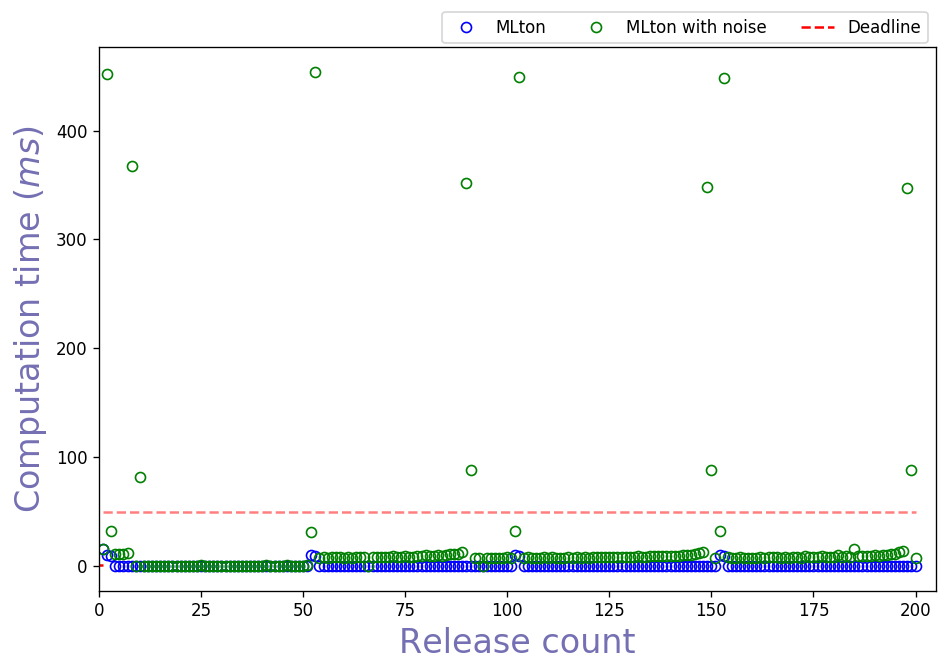

In [146]:
#MLTon

#prep data
with open("mlton_noise.txt") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]
content = [x for x in content if x.startswith('@')][0]
content=content[1:-2]

noise =  [int(s) for s in content.split(',')]

noise=[x/1000 for x in noise][:200]

#prep data
with open("mlton_nonoise.txt") as f:
    content2 = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content2 = [x.strip() for x in content2]
content2 = [x for x in content2 if x.startswith('@')][0]
content2=content2[1:-2]

nonoise =  [int(s) for s in content2.split(',')]

nonoise = [x/1000 for x in nonoise][:200]


data2 = range(1,len(noise)+1,1)

data4 = [50 for x in data2]

'''
rtnonoise = [11299,10782,11073,256,221,217,217,224,223,252,214,215,216,211,255,216,213,241,214,259,214,214,212,223,220
             ,217,219,219,216,219,217,217,227,217,218,218,217,219,227,214,211,213,214,230,213,213,210,212,213,212,247
             ,375,375,392,413,385,383,385,383,384,394,384,384,384,389,375,374,373,374,374,373,381,375,373,375,375,375
             ,392,411,391,393,414,384,384,382,384,384,382,384,525,415,424,387,383,387,389,385,387,385,382,387,395,386
             ,387,399,392,403,403,400,402,401,408,401,401,427,393,426,383,386,385,383,393,381,387,390,389,428,389,385
             ,388,387,397,392,390,391,392,411,392,411,394,391,398,392,391,390,393,391,393,390,393,393,406,400,398,397
             ,397,395,397,399,397,398,407,419,389,389,386,389,543,413,391,390,420,400,406,402,406,407,402,402,414,402
             ,395,392,395,399,394,399,399,394,388,401,396,394,386,401,408,403,405,409,405]

rtnonoise = [x/1000 for x in rtnonoise]


rtnoise = [19319,383462,13092,213,195,306943,214,215,235,240,248,217,196,209,214,208,200,207,213,240,230,208,216,401,12609,383303,878,367618,213,208,214,217,225,216,222,212,201,211,200,191,199,207,216,210,202,217,1003,376909,13044,201,222,366772,215,209,213,216,196,209,216,210,216,208,258,231,195,210,214,209,216,372,12249,376356,842,225,223,375926,214,210,214,196,221,209,211,205,221,231,200,210,207,196,214,209,1008,310626,13752,230,264,241,215,374009,215,304244,219,368559,232,302085,222,301260,244,301801,213,367337,217,302198,196,366544,12264,12019,827,215,217,366665,215,302961,197,302266,215,302426,234,301845,213,367203,215,301503,226,301588,214,367087,1015,375999,12923,196,214,213,218,222,226,367470,215,301654,214,301626,215,301595,215,303568,214,305019,219,366682,215,367332,12234,11824,840,194,213,214,196,216,205,301596,214,301820,215,302172,215,366825,214,302697,221,301631,215,367777,998,377297,13010,213,226,215,212,214,214,221,234,194,214,214,215,368164]

rtnoise = [x/1000 for x in rtnoise]
'''


test = [447893,4300,4964,5846,8369,13727,446849,10389,10684,12240,12854,14104,17452,455254,10396,10533,13060,12716,13799,18888,456554,10426,10598,11567,12410,14978,18756,435002,10498,12139,12308,13213,16782,22303,431890,10486,11470,12904,13485,17062,444333,10498,11589,12245,13190,25449,435027,10398,11965,12901,13949,18468,439385,10615,12216,12165,13897,16454,444261,10428,11921,13881,14144,18043,440684,10421,12012,12954,13876,18539,439757,10715,12115,13401,14553,21722,433364,11148,11911,13620,15249,21875,434836,11234,11864,14295,16050,444986,11459,11835,18127,17937,443347,11292,11870,14240,15953,444730,11419,11848,13701,15882,26245,431966,11201,13438,14809,19443,438593,11341,12521,14183,17275,441659,11309,12595,14192,17426,443366,11260,13140,14453,11813,442557,11999,12605,15108,18740,439649,11984,12499,16345,25267,434080,12029,21286,444471,11217,13254,15022,18623,441140,11964,13192,16319,444479,12265,13248,15119,22464,438847,11985,13873,17178,444411,12058,13317,16322,26681,432685,12736,13905,18191,446258,12040,14034,17003,444154,11937,13847,18199,443362,12752,13943,18183,446504,12878,13972,11381,443712,18397,18498,444705,12848,15718,24329,435788,13349,16917,451709,12700,14822,21890,437332,13358,16218,27743,436209,14141,18389]

test=[x/1000 for x in test]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6),dpi=120,)



plt.xlim(0,len(noise)+5)

rc = dict(markerfacecolor='#e7298a', marker='o',alpha=0.5)
plt.ylabel("Computation time ($ms$)",color = '#7570b3',fontsize=20)
plt.xlabel("Release count",color = '#7570b3',fontsize=20)


from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('medium')

# Legend creation
hB, = plt.plot([1,1],'o',color='b',fillstyle ='none')
hR, = plt.plot([1,1],'o',color='g',fillstyle='none')
hL, = plt.plot([1,1],'--',color='r')
plt.legend((hB, hR,hL),('MLton', 'MLton with noise','Deadline'),prop = fontP,loc=1,ncol=3,bbox_to_anchor=(0., 0.98, 1., .1))
hB.set_visible(False)
hR.set_visible(False)


plt.plot(data2,nonoise,'bo',data2,noise,'go',fillstyle='none')
plt.plot(data2,data4,'r--',alpha=0.5)

plt.show()